In [131]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [132]:
np.random.seed(0)

In [133]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [134]:
print(X_train.shape) # 60000 images 28x28
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [135]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


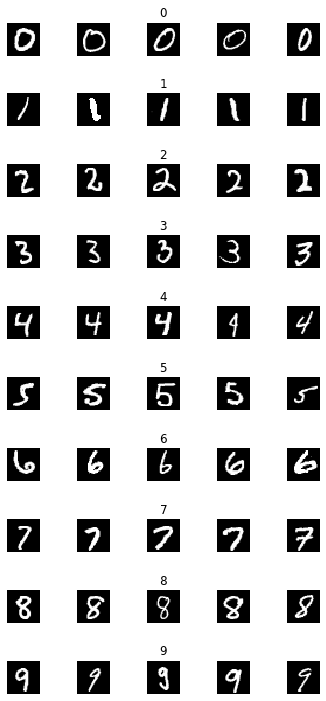

In [136]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[ y_train == j ]    # get images corresponding to the row number
#         select random element from filtered images with range from (0, max_length-1)
#         change colour map (cmap) to grayscale
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1), : ,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")    # turns off axis labels
        if i==2:
            axs[j][i].set_title(str(j))   # display labels in the middle column
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

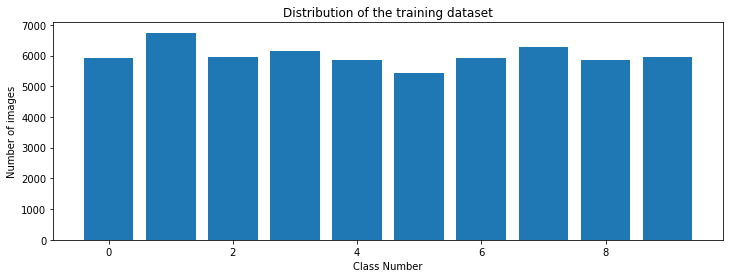

In [137]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [138]:
y_train = to_categorical(y_train, 10)     # one-hot encoding
y_test = to_categorical(y_test, 10)

In [139]:
X_train = X_train/255    # normalising the intensities of each pixel
X_test = X_test/255

In [140]:
num_pixels = 28*28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
print(X_train.shape)
num_pixels = 28*28
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)

(60000, 784)
(60000, 784)


In [141]:
def create_model():
    model = Sequential()
    model.add(Dense(units=10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    adam = Adam(lr=0.01)
    model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [142]:
model = create_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_23 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                310       
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
history = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.4040 - accuracy: 0.8776 - val_loss: 0.1998 - val_accuracy: 0.9423
Epoch 2/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2339 - accuracy: 0.9309 - val_loss: 0.1854 - val_accuracy: 0.9455
Epoch 3/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.2138 - accuracy: 0.9365 - val_loss: 0.1687 - val_accuracy: 0.9508
Epoch 4/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1925 - accuracy: 0.9434 - val_loss: 0.1662 - val_accuracy: 0.9515
Epoch 5/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.1809 - accuracy: 0.9451 - val_loss: 0.1705 - val_accuracy: 0.9518
Epoch 6/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.1757 - accuracy: 0.9462 - val_loss: 0.1633 - val_accuracy: 0.9510
Epoch 7/10
54000/54000 [==============================] - 1s 20us/ste

Text(0.5, 0, 'Epoch')

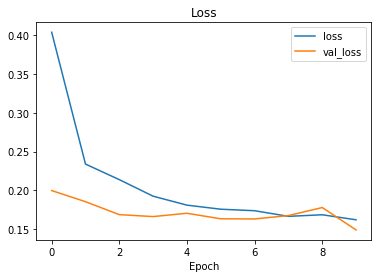

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

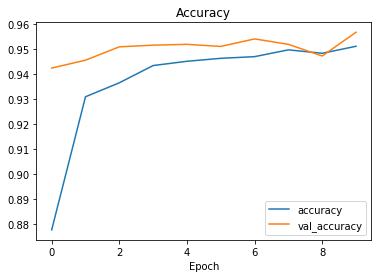

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [146]:
print(y_train.shape)

(60000, 10)


In [147]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.18275552409049123
Test accuracy:  0.9478999972343445


<Response [200]>


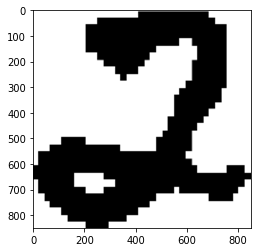

In [148]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

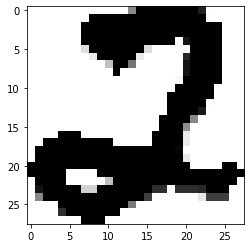

In [149]:
import cv2

img_array = np.asarray(img)
# print(img_array.shape)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
image = cv2.bitwise_not(gray_scale)

In [150]:
image = image/255
image = image.reshape(1, 784)
# print(image)

In [151]:
prediction = model.predict_classes(image)
print("Predicted Digit: ", str(prediction))

Predicted Digit:  [5]
